In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Circle
import astropy.units as u
import sunpy.map
from AntennaUtils import *  

# Imprimimos estadísticas resumidas del DataFrame final
pd.set_option('display.float_format', '{:.10f}'.format)

c:\Users\2012m\Desktop\RT-32-SunImage\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# RT32 location (Ventspils, Latvia)
rt32_antenna = RT32()
rt32_antenna.set_location(latitude=57.5535171694, longitude=21.8545525000, elevation=20)

# Define constants
path = ''
year = 2024
month = 4
day = 25
hour_start = 8
minute_start = 55

temperature = u.Quantity(20.0, unit=u.deg_C)
pressure = u.Quantity(1013.25, unit=u.hPa)
relative_humidity = u.Quantity(60.0, unit=u.percent)
obswl =u.Quantity(50000, unit=u.nm) 

weather = Weather(temperature, pressure, relative_humidity, obswl)

observation = SpiralSunObservation(weather,rt32_antenna , year , month , day , hour_start , minute_start)

az_anten, el_anten , az_sun , el_sun , xx1 , yy1, utc = observation.calculatePositions()
observation.generateFile(path, az_anten , el_anten , utc)  

Starting calculation
-------------------------------------------------------------
Saved:  sun_scan_240425_0855.ptf    3300   points


True

In [3]:
# Create DataFrame
sunPositionDf = pd.DataFrame({'UTC': utc,'SunX': xx1, 'SunY': yy1  })

fit_file_path = "FITS/lnsp4_5ch_240425_084453_095112.fit"
hdu_number = 1  # Number of the extension containing the binary table

# Converts the binary table to a Pandas DataFrame
data_df = bintable_to_pandas_OLD(fit_file_path, hdu_number)



In [6]:

band_data_dfs = processData(data_df)

print(band_data_dfs.keys())



Renaming columns
Index(['LCP 4.07GHZ', 'LCP 6.42GHZ', 'LCP 8.40GHZ', 'LCP 9.80GHZ',
       'LCP 11.90GHZ', 'RCP 4.07GHZ', 'RCP 6.42GHZ', 'RCP 8.40GHZ',
       'RCP 9.80GHZ', 'RCP 11.90GHZ', 'UTC LCP 4.07GHZ', 'UTC LCP 6.42GHZ',
       'UTC LCP 8.40GHZ', 'UTC LCP 9.80GHZ', 'UTC LCP 11.90GHZ',
       'UTC RCP 4.07GHZ', 'UTC RCP 6.42GHZ', 'UTC RCP 8.40GHZ',
       'UTC RCP 9.80GHZ', 'UTC RCP 11.90GHZ'],
      dtype='object')
dict_keys(['4.07GHZ', '6.42GHZ', '8.40GHZ', '9.80GHZ', '11.90GHZ'])


In [7]:
processed_dfs = getFinalProcessedData(observation , sunPositionDf,band_data_dfs)

print(processed_dfs)

Interpolating data...
Filtering data...
Index(['UTC', 'SunX', 'SunY', 'UTC_4.07GHZ', 'STOKE_I_4.07GHZ',
       'STOKE_V_4.07GHZ'],
      dtype='object')
Calibrating data...
                   UTC            SunX            SunY      UTC_4.07GHZ  \
count  1208.0000000000 1208.0000000000 1208.0000000000  1208.0000000000   
mean  33730.6401349338    0.1019437384   -0.1854486492 33730.6401349338   
std     945.4211653527   15.5409520444   15.5198107702   945.4211653527   
min   32160.7540000000  -38.0602674713  -38.8915840082 32160.7540000000   
25%   32944.9547500000  -10.1192842752  -10.3024273484 32944.9547500000   
50%   33731.2485000000    0.1180013059   -0.1445661170 33731.2485000000   
75%   34515.4930000000   10.2299915578    9.9026814367 34515.4930000000   
max   35299.7450000000   39.3948491859   39.6133267133 35299.7450000000   

       STOKE_I_4.07GHZ  STOKE_V_4.07GHZ  
count  1208.0000000000  1208.0000000000  
mean      0.7308815297     0.7263664804  
std       0.6899917619   

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_I_{band}'] = (rest_of_df[f'STOKE_I_{band}'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_V_{band}'] = (rest_of_df[f'STOKE_V_{band}'] - min_vect[1]) / (max_vect[1] - min_vect[1])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:447: SettingWithCopyWarning: 
A 

Index(['UTC', 'SunX', 'SunY', 'UTC_6.42GHZ', 'STOKE_I_6.42GHZ',
       'STOKE_V_6.42GHZ'],
      dtype='object')
Calibrating data...
                   UTC            SunX            SunY      UTC_6.42GHZ  \
count  1207.0000000000 1207.0000000000 1207.0000000000  1207.0000000000   
mean  33730.4327937034    0.0509800575   -0.1715961091 33730.4327937034   
std     944.2572672130   15.5154914576   15.5154021524   944.2572672130   
min   32161.1680000000  -38.0345351316  -38.9266032393 32161.1680000000   
25%   32946.9195000000  -10.1085958211  -10.3242924938 32946.9195000000   
50%   33730.6260000000    0.0726710631   -0.2470059647 33730.6260000000   
75%   34514.3550000000   10.2112716896    9.9755905417 34514.3550000000   
max   35298.0900000000   39.4065969263   39.6743874106 35298.0900000000   

       STOKE_I_6.42GHZ  STOKE_V_6.42GHZ  
count  1207.0000000000  1207.0000000000  
mean      0.5801864320     0.4541261047  
std       0.5154973631     1.0126668937  
min      -0.0005203391 

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_I_{band}'] = (rest_of_df[f'STOKE_I_{band}'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_V_{band}'] = (rest_of_df[f'STOKE_V_{band}'] - min_vect[1]) / (max_vect[1] - min_vect[1])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:447: SettingWithCopyWarning: 
A 

Index(['UTC', 'SunX', 'SunY', 'UTC_8.40GHZ', 'STOKE_I_8.40GHZ',
       'STOKE_V_8.40GHZ'],
      dtype='object')
Calibrating data...
                   UTC            SunX            SunY      UTC_8.40GHZ  \
count  1206.0000000000 1206.0000000000 1206.0000000000  1206.0000000000   
mean  33730.0922678275    0.0691464851   -0.1446695002 33730.0922678275   
std     944.2854973421   15.5296786867   15.5139745794   944.2854973421   
min   32161.5900000000  -38.2003387795  -38.9428371611 32161.5900000000   
25%   32946.8150000000  -10.0752017192  -10.2823937616 32946.8150000000   
50%   33730.0085000000    0.0702836396   -0.2455157044 33730.0085000000   
75%   34513.2160000000   10.1542338524   10.0960624094 34513.2160000000   
max   35298.5040000000   39.3741285732   39.7313702297 35298.5040000000   

       STOKE_I_8.40GHZ  STOKE_V_8.40GHZ  
count  1206.0000000000  1206.0000000000  
mean      0.5409331928     0.6835553048  
std       0.4674366582     0.6815354102  
min      -0.0026371570 

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_I_{band}'] = (rest_of_df[f'STOKE_I_{band}'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_V_{band}'] = (rest_of_df[f'STOKE_V_{band}'] - min_vect[1]) / (max_vect[1] - min_vect[1])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:447: SettingWithCopyWarning: 
A 

Index(['UTC', 'SunX', 'SunY', 'UTC_9.80GHZ', 'STOKE_I_9.80GHZ',
       'STOKE_V_9.80GHZ'],
      dtype='object')
Calibrating data...
                   UTC            SunX            SunY      UTC_9.80GHZ  \
count  1207.0000000000 1207.0000000000 1207.0000000000  1207.0000000000   
mean  33729.7516114333    0.0684010183   -0.1448227025 33729.7516114333   
std     944.2573998532   15.5449661403   15.5284288834   944.2573998532   
min   32162.0030000000  -38.4878458364  -38.9330851029 32162.0030000000   
25%   32945.6775000000   -9.8737100538  -10.2129170948 32945.6775000000   
50%   33729.3800000000    0.0668749943   -0.1720846657 33729.3800000000   
75%   34513.1145000000   10.3353258536   10.1626299922 34513.1145000000   
max   35298.9160000000   39.3449325157   39.7473757463 35298.9160000000   

       STOKE_I_9.80GHZ  STOKE_V_9.80GHZ  
count  1207.0000000000  1207.0000000000  
mean      0.5130531521     0.4522848874  
std       0.4390928433     0.4155614947  
min      -0.0066151203 

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_I_{band}'] = (rest_of_df[f'STOKE_I_{band}'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_V_{band}'] = (rest_of_df[f'STOKE_V_{band}'] - min_vect[1]) / (max_vect[1] - min_vect[1])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:447: SettingWithCopyWarning: 
A 

Index(['UTC', 'SunX', 'SunY', 'UTC_11.90GHZ', 'STOKE_I_11.90GHZ',
       'STOKE_V_11.90GHZ'],
      dtype='object')
Calibrating data...
                   UTC            SunX            SunY     UTC_11.90GHZ  \
count  1208.0000000000 1208.0000000000 1208.0000000000  1208.0000000000   
mean  33729.5443021523    0.1001083590   -0.1529778719 33729.5443021523   
std     945.4213519420   15.5200234880   15.5404795033   945.4213519420   
min   32160.3360000000  -38.0754417838  -38.9233330446 32160.3360000000   
25%   32944.5422500000   -9.9829249074  -10.3283296813 32944.5422500000   
50%   33728.7645000000    0.0865394949   -0.0871677656 33728.7645000000   
75%   34515.0750000000   10.3267607060    9.9663040568 34515.0750000000   
max   35299.3300000000   39.3832717026   39.7634589595 35299.3300000000   

       STOKE_I_11.90GHZ  STOKE_V_11.90GHZ  
count   1208.0000000000   1208.0000000000  
mean       0.4843091700      0.5171327393  
std        0.4120509748      0.7121581777  
min       -0

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_I_{band}'] = (rest_of_df[f'STOKE_I_{band}'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df[f'STOKE_V_{band}'] = (rest_of_df[f'STOKE_V_{band}'] - min_vect[1]) / (max_vect[1] - min_vect[1])


{'4.07GHZ':                   UTC          SunX           SunY      UTC_4.07GHZ  \
29   32160.7540000000  0.1772550337  -0.1122672674 32160.7540000000   
30   32162.8240000000  0.3653879834   0.1422637015 32162.8240000000   
31   32164.8950000000  0.3792585598   0.4997209698 32164.8950000000   
32   32167.1770000000  0.1462671993   0.9024035868 32167.1770000000   
33   32169.2580000000 -0.2831038516   1.1668241037 32169.2580000000   
...               ...           ...            ...              ...   
1541 35291.4740000000  8.4839556260 -38.3910088007 35291.4740000000   
1542 35293.5440000000 12.6342585504 -37.4541396564 35293.5440000000   
1543 35295.6050000000 16.6625717053 -36.0730274457 35295.6050000000   
1544 35297.6780000000 20.5607331382 -34.2445130025 35297.6780000000   
1545 35299.7450000000 24.2465056123 -31.9993888266 35299.7450000000   

      STOKE_I_4.07GHZ  STOKE_V_4.07GHZ                isoT_time  
29       1.0101962380     0.9300352341  2024-04-25T08:56:00.000  
30 

c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df["isoT_time"] = rest_of_df.apply(lambda row: seconds_to_time(observation.year, observation.month, observation.day, row["UTC"]), axis=1)


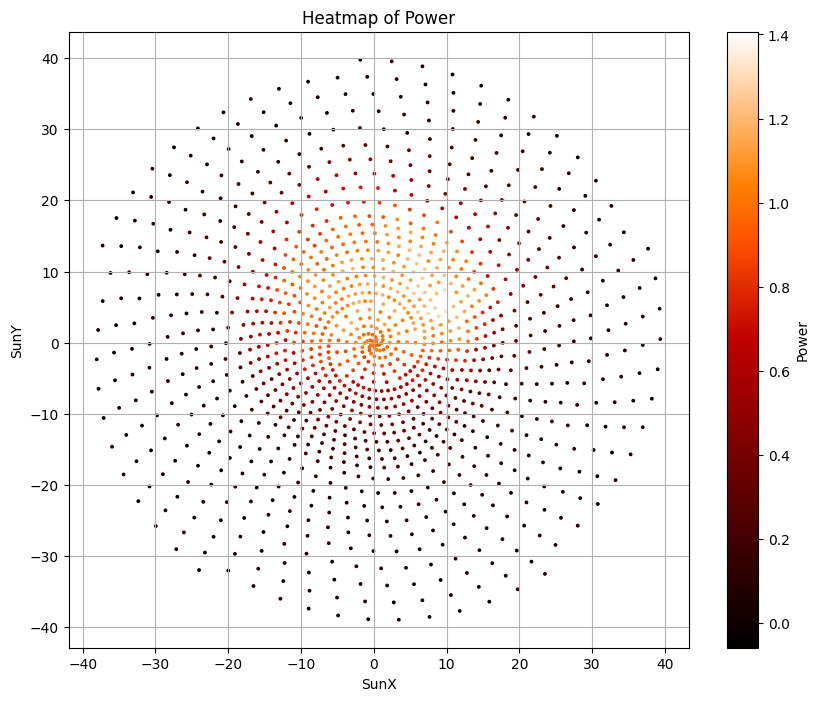

In [8]:
# Create the heatmap
Power = processed_dfs['11.90GHZ']["STOKE_I_11.90GHZ"].values 

plt.figure(figsize=(10, 8))
plt.scatter(processed_dfs['11.90GHZ']['SunX'], processed_dfs['11.90GHZ']['SunY'], c=Power, cmap='gist_heat',s=3)
plt.colorbar(label='Power')
plt.xlabel('SunX')
plt.ylabel('SunY')
plt.title('Heatmap of Power')
plt.grid(True)  # Display the grid for clarity
plt.show()

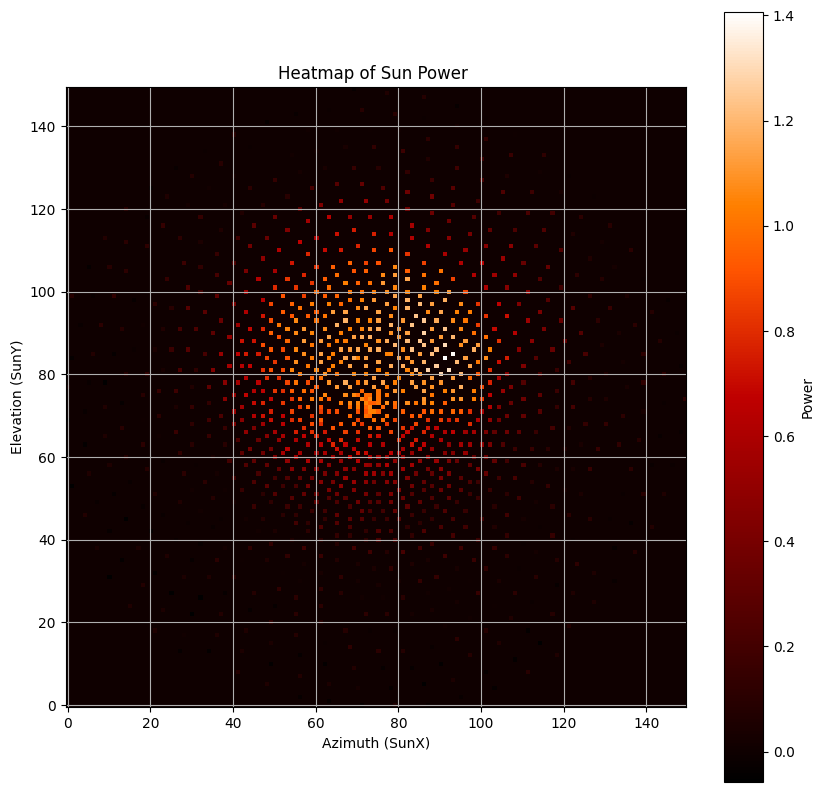

In [9]:
SunX = processed_dfs['11.90GHZ']['SunX']
SunY = processed_dfs['11.90GHZ']['SunY']
Power = processed_dfs['11.90GHZ']["STOKE_I_11.90GHZ"].values 

# Define the size of the grid and create a matrix of zeroes
grid_size = 150
grid_power = np.zeros((grid_size, grid_size))

# Calculate the scale for converting SunX and SunY coordinates to matrix indices
x_min, x_max = SunX.min(), SunX.max()
y_min, y_max = SunY.min(), SunY.max()
x_range = x_max - x_min
y_range = y_max - y_min

# Convert SunX and SunY coordinates to matrix indices
grid_x_index = ((SunX - x_min) / x_range * (grid_size - 1)).astype(int)
grid_y_index = ((SunY - y_min) / y_range * (grid_size - 1)).astype(int)

# Assign Power values to the matrix in the corresponding positions
grid_power[grid_y_index, grid_x_index] = Power

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(grid_power, cmap='gist_heat', origin='lower')
plt.colorbar(label='Power')
plt.xlabel('Azimuth (SunX)')
plt.ylabel('Elevation (SunY)')
plt.title('Heatmap of Sun Power ')
plt.grid(True)  # Display the grid for clarity
plt.show()


In [10]:
band_processed_helio_dfs = process_all_heliocentric_coordinates(processed_dfs, observation )


c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:541: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['az_anten'] = az_anten
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:542: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_df['el_anten'] = el_anten


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


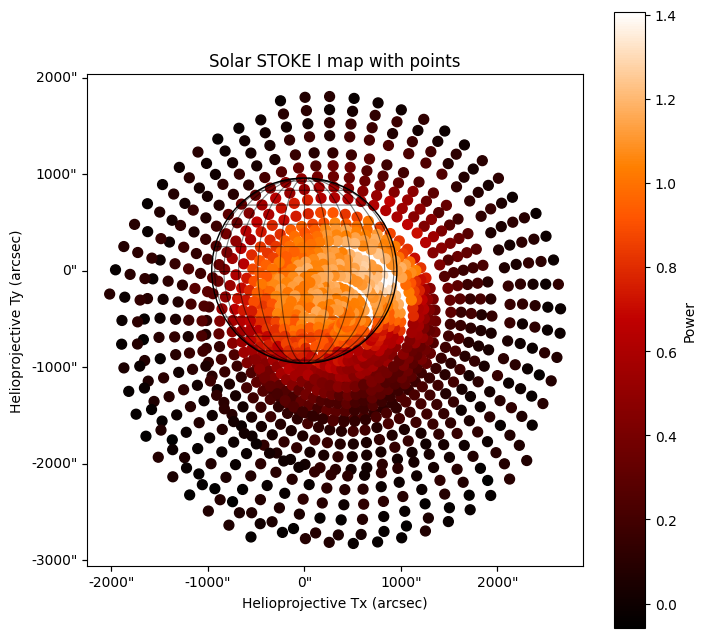

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map

# Supongamos que tienes un DataFrame llamado rest_of_df y tienes dos arrays de objetos coordsXHelio y coordsYHelio
# Definir las coordenadas x e y para los puntos (SunX y SunY)
SunX = band_processed_helio_dfs["11.90GHZ"]['tx_helio_anten']
SunY = band_processed_helio_dfs["11.90GHZ"]['ty_helio_anten']
Power = processed_dfs['11.90GHZ']["STOKE_I_11.90GHZ"].values


# Definir metadatos para el mapa solar
metadata = {
    'date-obs': f'{year}-{month}-{day}T{hour_start}:{minute_start}:00',  # Ajusta esto a la fecha de observación correcta
    'crval1': 0,  
    'crval2': 0,  
    'cdelt1': 1,  
    'cdelt2': 1,  
    'cunit1': 'arcsec',  
    'cunit2': 'arcsec',  
    'ctype1': 'HPLN-TAN',  
    'ctype2': 'HPLT-TAN',  
    'crpix1': 0, 
    'crpix2': 0,  
    'waveunit': 'm',  
    'wavelnth': 0.0262897 * u.m,  
    'obsrvtry': 'Ventspils International Radio Astronomy Center',  
    'detector': 'LNSP4',  
    'dsun_obs': 1 * u.AU,  
    'hglt_obs': 0 * u.deg,  
    'hgln_obs': 0 * u.deg,  
}


blank_map = sunpy.map.Map((np.zeros((10, 10)), metadata))

# Crear el gráfico
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")


scatter = ax.scatter(SunX, SunY, c=Power, cmap='gist_heat', s=50)

plt.colorbar(scatter,label='Power' , ax=ax) 
plt.title('Solar STOKE I map with points')
plt.xlabel('Helioprojective Tx (arcsec)')
plt.ylabel('Helioprojective Ty (arcsec)')
plt.grid(True)
plt.show()


In [14]:
from scipy.interpolate import Rbf
#bands = ['4.07GHZ', '6.42GHZ', '8.40GHZ', '9.80GHZ', '11.90GHZ']

SunX = band_processed_helio_dfs["8.40GHZ"]['tx_helio_anten']
SunY = band_processed_helio_dfs["8.40GHZ"]['ty_helio_anten']
STOKE_I = processed_dfs['8.40GHZ']["STOKE_I_8.40GHZ"].values
STOKE_V = processed_dfs['8.40GHZ']["STOKE_V_8.40GHZ"].values

# Define the grid covering the helioprojective coordinate space
tx_min, tx_max = -1200, 1200
ty_min, ty_max = -1200, 1200
grid_step = 10  # Adjust as needed

# Create a grid
tx, ty = np.meshgrid(np.arange(tx_min, tx_max, grid_step),
                     np.arange(ty_min, ty_max, grid_step))

# Interpolate power values for each point on the grid using Rbf
rbf = Rbf(SunX, SunY, STOKE_I, function='linear')
interp_power_STOKE_I = rbf(tx, ty)

# Create a grid
tx, ty = np.meshgrid(np.arange(tx_min, tx_max, grid_step),
                     np.arange(ty_min, ty_max, grid_step))

# Interpolate power values for each point on the grid using Rbf
rbf = Rbf(SunX, SunY, STOKE_V, function='linear')
interp_power_STOKE_V= rbf(tx, ty)




INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


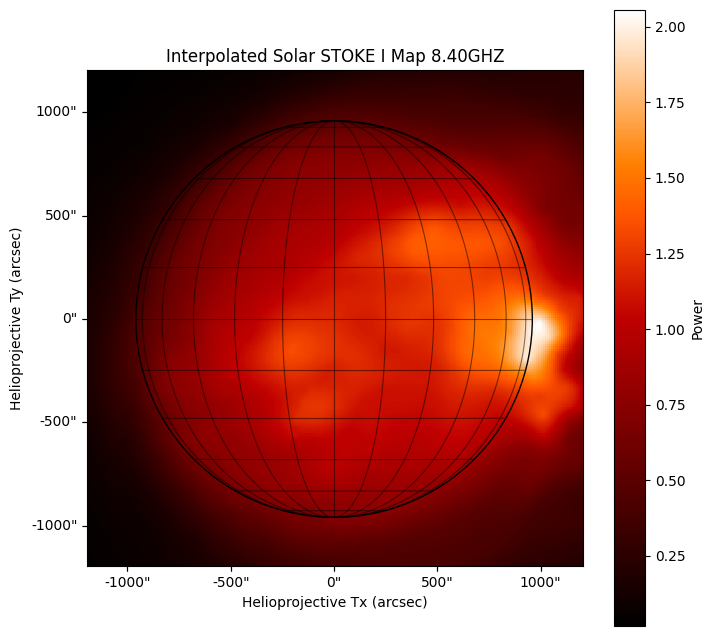

In [15]:

# Define metadata for the solar map
metadata = {
    'date-obs': f'{year}-{month}-{day}T{hour_start}:{minute_start}:00',  # Adjust this to the correct observation date
    'crval1': 0,
    'crval2': 0,
    'cdelt1': grid_step,
    'cdelt2': grid_step,
    'cunit1': 'arcsec',
    'cunit2': 'arcsec',
    'ctype1': 'HPLN-TAN',
    'ctype2': 'HPLT-TAN',
    'crpix1': (tx_max - tx_min) / (2 * grid_step),
    'crpix2': (ty_max - ty_min) / (2 * grid_step),
    'waveunit': 'm',
    'wavelnth': 0.0262897 * u.m,
    'obsrvtry': 'Ventspils International Radio Astronomy Center',
    'detector': 'LNSP4',
    'dsun_obs': 1 * u.AU,
    'hglt_obs': 0 * u.deg,
    'hgln_obs': 0 * u.deg,
}

# Create a map using the interpolated power values and metadata
interpolated_map = sunpy.map.Map((interp_power_STOKE_I, metadata))

# Plot the interpolated map using a heatmap with the 'hot' colormap
plt.figure(figsize=(8, 8))
interpolated_map.plot(cmap='gist_heat')
interpolated_map.draw_limb(color="k")
interpolated_map.draw_grid(color="k")
plt.colorbar(label='Power')
plt.title('Interpolated Solar STOKE I Map 8.40GHZ')
plt.xlabel('Helioprojective Tx (arcsec)')
plt.ylabel('Helioprojective Ty (arcsec)')
plt.grid(True)
plt.show()

# Save the figure as a JPEG file
# plt.savefig('solar_map.jpeg', format='jpeg', dpi=300)

# Close the plot to free up memory
# plt.close()

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


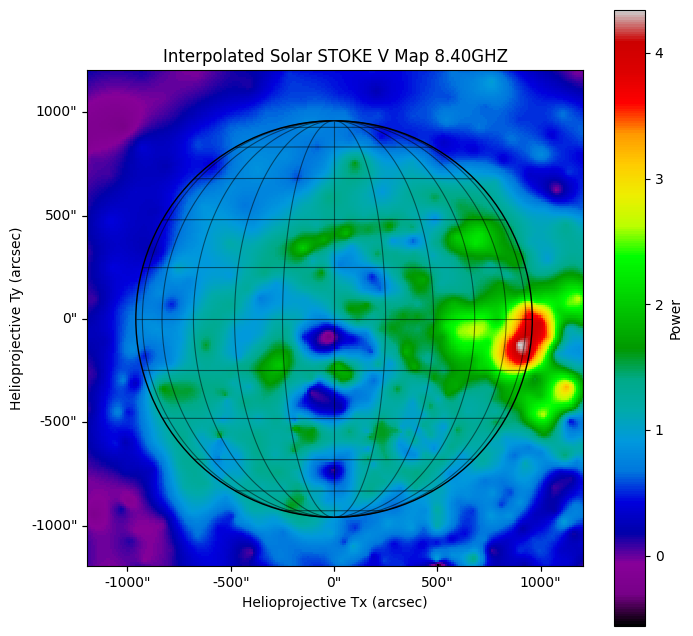

In [16]:

# Define metadata for the solar map
metadata = {
    'date-obs': '2024-04-30T16:00:00',  # Adjust this to the correct observation date
    'crval1': 0,
    'crval2': 0,
    'cdelt1': grid_step,
    'cdelt2': grid_step,
    'cunit1': 'arcsec',
    'cunit2': 'arcsec',
    'ctype1': 'HPLN-TAN',
    'ctype2': 'HPLT-TAN',
    'crpix1': (tx_max - tx_min) / (2 * grid_step),
    'crpix2': (ty_max - ty_min) / (2 * grid_step),
    'waveunit': 'm',
    'wavelnth': 0.0262897 * u.m,
    'obsrvtry': 'Ventspils International Radio Astronomy Center',
    'detector': 'LNSP4',
    'dsun_obs': 1 * u.AU,
    'hglt_obs': 0 * u.deg,
    'hgln_obs': 0 * u.deg,
}

# Create a map using the interpolated power values and metadata
interpolated_map = sunpy.map.Map((interp_power_STOKE_V, metadata))

# Plot the interpolated map using a heatmap with the 'hot' colormap
plt.figure(figsize=(8, 8))
interpolated_map.plot(cmap='nipy_spectral')
interpolated_map.draw_limb(color="k")
interpolated_map.draw_grid(color="k")
plt.colorbar(label='Power')
plt.title('Interpolated Solar STOKE V Map 8.40GHZ')
plt.xlabel('Helioprojective Tx (arcsec)')
plt.ylabel('Helioprojective Ty (arcsec)')
plt.grid(True)
plt.show()
